In [1]:
#look into the dataset

import pandas as pd

file_path = "/content/result.csv"
df = pd.read_csv(file_path)
df.head(), df.columns.tolist()

(                                     id explain/emotion  true/false  \
 0  f0a1bd56-d634-4143-a42e-f74b2e2efc2e         Explain       False   
 1  f0a1bd56-d634-4143-a42e-f74b2e2efc2e         Explain        True   
 2  f0a1bd56-d634-4143-a42e-f74b2e2efc2e         Explain       False   
 3  f0a1bd56-d634-4143-a42e-f74b2e2efc2e         Explain        True   
 4  f0a1bd56-d634-4143-a42e-f74b2e2efc2e         Explain       False   
 
    showing picture or not  user answer user response  response time  
 0                   False        False          prob          35.51  
 1                    True        False          prob          84.56  
 2                    True        False    not really          95.62  
 3                    True         True           yes         104.80  
 4                    True         True    likely yes         113.93  ,
 ['id',
  'explain/emotion',
  'true/false',
  'showing picture or not',
  'user answer',
  'user response',
  'response time'])

**Notes to keep everything straight**

id: participant ID

explain/emotion: group assignment (Explain or Emotion)

true/false: the actual truth value of the statement

showing picture or not: whether a nonprobative photo was shown

user answer: participant’s truth judgment

user response: their free-text explanation or emotional reaction

response time: time (in seconds) to complete the judgment + response

### **Accuracy Analysis**
Test if:

Photos increase belief in false statements more in the Emotion group than in the Explain group.

The Explain group shows higher overall accuracy, especially when photos are present.

Metric: Accuracy = proportion of correct user answer matches true/false



In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['correct'] = df['user_answer'] == df['true/false']

accuracy_summary = df.groupby(['explain/emotion', 'showing_picture_or_not'])['correct'].mean().reset_index()
accuracy_summary['accuracy'] = (accuracy_summary['correct'] * 100).round(2)
accuracy_summary = accuracy_summary.drop(columns='correct')

accuracy_summary

,explain/emotion,showing_picture_or_not,accuracy
0,Emotion,False,50.74
1,Emotion,True,53.68
2,Explain,False,52.21
3,Explain,True,49.26


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

file_path = "/content/result.csv"
df = pd.read_csv(file_path)
df.columns.tolist()

df = df.rename(columns={
    'id': 'participant_id',
    'explain/emotion': 'group',
    'true/false': 'truth',
    'showing picture or not': 'photo_condition',
    'user answer': 'response',
    'response time': 'response_time'
})

df['accuracy'] = (df['truth'] == df['response']).astype(int)

individual_scores = df.groupby(['participant_id', 'group', 'photo_condition'])['accuracy'].agg(['sum', 'count']).reset_index()
individual_scores['accuracy_score'] = individual_scores['sum'].astype(str) + '/' + individual_scores['count'].astype(str)

individual_scores

,participant_id,group,photo_condition,sum,count,accuracy_score
0,00e83a7f-b11c-41d8-95a7-4aab8a1e0d17,Explain,False,6,8,6/8
1,00e83a7f-b11c-41d8-95a7-4aab8a1e0d17,Explain,True,2,8,2/8
2,0274c724-077e-4f08-b391-636b7cad7555,Emotion,False,8,8,8/8
3,0274c724-077e-4f08-b391-636b7cad7555,Emotion,True,6,8,6/8
4,1280a0d0-a38a-4e8a-b68b-b5c063582ed7,Explain,False,2,8,2/8
...,...,...,...,...,...,...
63,f0a1bd56-d634-4143-a42e-f74b2e2efc2e,Explain,True,3,8,3/8
64,fd65a4ec-3179-454b-a39c-95bebdd3e519,Emotion,False,6,8,6/8
65,fd65a4ec-3179-454b-a39c-95bebdd3e519,Emotion,True,6,8,6/8
66,fedfe645-408b-44f8-bec8-d5d55a7d811d,Emotion,False,1,8,1/8


<ipython-input-27-f327f02a76a6>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=participant_scores, x='photo_condition', y='accuracy_rate', hue='group', ci='sd', palette='pastel', edgecolor='gray')
<ipython-input-27-f327f02a76a6>:9: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=participant_scores, x='photo_condition', y='accuracy_rate', hue='group', dodge=True, alpha=0.4, linewidth=0.5, edgecolor='gray', palette='dark')


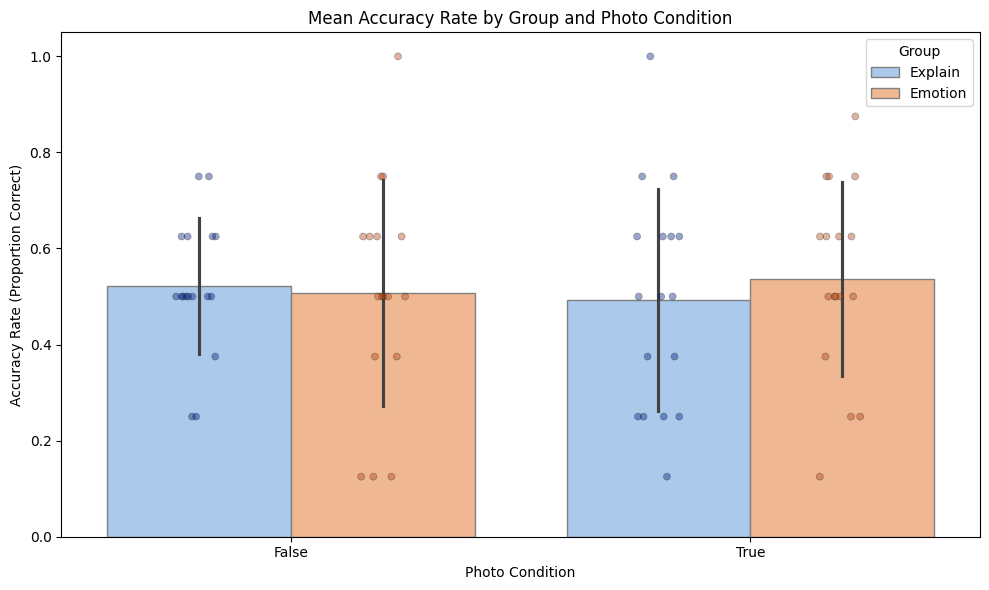

In [27]:
participant_scores = (
    df.groupby(['participant_id', 'group', 'photo_condition'])
    .agg(accuracy_rate=('accuracy', 'mean'))
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=participant_scores, x='photo_condition', y='accuracy_rate', hue='group', ci='sd', palette='pastel', edgecolor='gray')
sns.stripplot(data=participant_scores, x='photo_condition', y='accuracy_rate', hue='group', dodge=True, alpha=0.4, linewidth=0.5, edgecolor='gray', palette='dark')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='Group')

plt.title('Mean Accuracy Rate by Group and Photo Condition')
plt.xlabel('Photo Condition')
plt.ylabel('Accuracy Rate (Proportion Correct)')
plt.tight_layout()
plt.show()


In [29]:
file_path = "/content/result.csv"
df = pd.read_csv(file_path)

df = df.rename(columns={
    'ResponseId': 'participant_id',
    'explain/emotion': 'group',
    'true/false': 'truth',
    'showing picture or not': 'photo_condition',
    'user answer': 'response',
    'response time': 'response_time'
})

df['accuracy'] = df['truth'] == df['response']
df['accuracy'] = df['accuracy'].astype(int)

model = ols('accuracy ~ C(group) * C(photo_condition)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(group),2.941176e-02,1.0,1.170098e-01,0.732434
C(photo_condition),3.439831e-30,1.0,1.368479e-29,1.000000
C(group):C(photo_condition),1.176471e-01,1.0,4.680390e-01,0.494184
Residual,1.357353e+02,540.0,NaN,NaN


C(group): No significant difference in accuracy between Explain and Emotion groups.

p = 0.732 → not statistically significant.

C(photo_condition): Photo presence had no effect on accuracy.

p = 1.000 → clearly not significant.

C(group):C(photo_condition): No significant interaction between group and photo presence.

p = 0.494 → the effect of photo presence didn’t depend on group.

Interpretation:
There’s no statistically significant main effect or interaction in this model. In other words:

Explanation alone didn’t improve accuracy.

Nonprobative photos didn’t bias accuracy.

Combining both didn’t reveal a hidden effect either.



### **Response Time Analysis**
Test if:

Photos reduce response time more in the Emotion group than in the Explain group.

The Explain group is slower overall (due to deeper processing).

Metric: Compare response time across conditions using mean or median.

<ipython-input-15-eba964b719f9>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='photo_condition', y='response_time', hue='group', ci='sd', palette='pastel', edgecolor='gray')
<ipython-input-15-eba964b719f9>:9: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=df, x='photo_condition', y='response_time', hue='group', dodge=True, alpha=0.4, linewidth=0.5, edgecolor='gray', palette='dark')


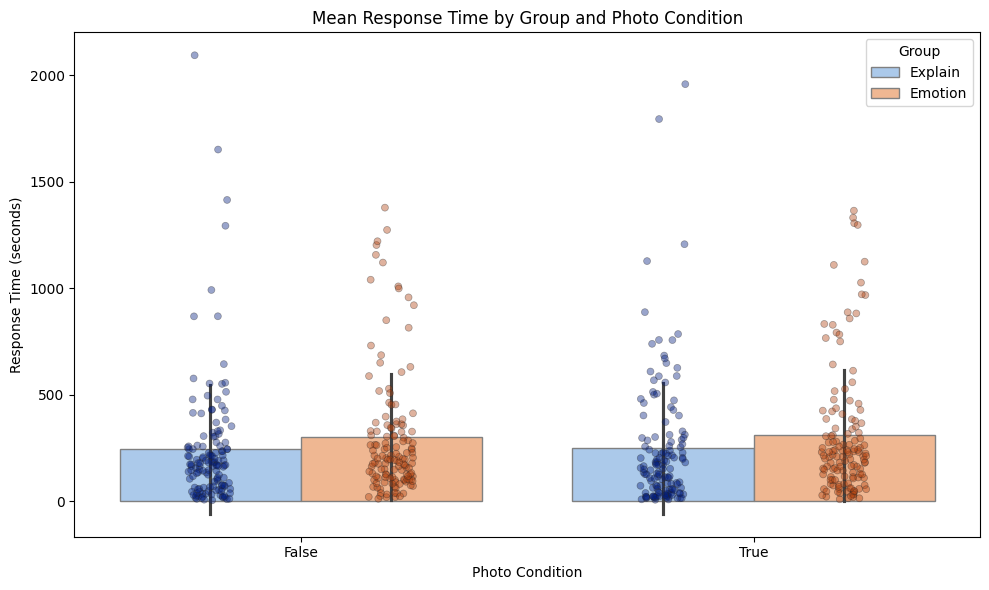

,sum_sq,df,F,PR(>F)
C(group),4.616331e+05,1.0,5.025188,0.025387
C(photo_condition),6.003751e+03,1.0,0.065355,0.798322
C(group):C(photo_condition),1.367732e+03,1.0,0.014889,0.902929
Residual,4.960648e+07,540.0,NaN,NaN


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='photo_condition', y='response_time', hue='group', ci='sd', palette='pastel', edgecolor='gray')
sns.stripplot(data=df, x='photo_condition', y='response_time', hue='group', dodge=True, alpha=0.4, linewidth=0.5, edgecolor='gray', palette='dark')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='Group')
plt.title('Mean Response Time by Group and Photo Condition')
plt.xlabel('Photo Condition')
plt.ylabel('Response Time (seconds)')
plt.tight_layout()
plt.show()


# Run two-way ANOVA on response time
model_rt = ols('response_time ~ C(group) * C(photo_condition)', data=df).fit()
anova_rt_table = sm.stats.anova_lm(model_rt, typ=2)
anova_rt_table


A two-way ANOVA was conducted to examine the effects of explanation condition (Explain vs. Emotion) and photo presence (Photo-Present vs. Photo-Absent) on participants' response times. The results revealed:

A significant main effect of explanation condition, F(1, 540) = 5.03, p = .025, indicating that participants in the Explain group took significantly longer to respond than those in the Emotion group.

No significant main effect of photo presence, F(1, 540) = 0.07, p = .798.

No significant interaction between group and photo presence, F(1, 540) = 0.015, p = .903.

These findings suggest that while the presence of nonprobative images did not affect how long participants took to respond, the requirement to explain led to slower, more deliberate processing, consistent with expectations.

### **Mixed ANOVA Design**

Design:

Within-subjects: showing picture or not

Between-subjects: explain/emotion

Dependent variables: accuracy, response time

In [31]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.0 MB/s eta 0:00:00


In [32]:
import pingouin as pg

# Perform a mixed ANOVA with:
# - 'accuracy' as the dependent variable
# - 'participant_id' as the subject identifier
# - 'photo_condition' as the within-subject factor
# - 'group' as the between-subject factor

mixed_anova = pg.mixed_anova(
    dv='accuracy',
    within='photo_condition',
    between='group',
    subject='id',
    data=df
)

mixed_anova.round(4)


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,0.0037,1,32,0.0037,0.0857,0.7716,0.0027,NaN
1,photo_condition,0.0000,1,32,0.0000,0.0000,1.0000,0.0000,1.0
2,Interaction,0.0147,1,32,0.0147,0.3500,0.5583,0.0108,NaN


No significant differences in accuracy were found between the Explain and Emotion groups, nor between photo-present and photo-absent conditions.

The interaction wasn’t significant either, suggesting that the effect of the photo condition didn’t depend on the group.

This implies that—at least in this dataset—adding explanation prompts did not significantly weaken the photo effect on accuracy, nor was there a photo effect at all in terms of judgment correctness.